In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from string import punctuation
from sklearn.feature_extraction import stop_words
stopwords = stop_words.ENGLISH_STOP_WORDS
import argparse

plt.rcParams.update({'font.size': 20})

In [3]:
raw = pd.read_csv('../data/mbti_1.csv')

In [4]:
raw.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
type_count = raw.groupby('type').count().sort_values(by='posts', ascending=False).reset_index()
type_count

,type,posts
0,INFP,1832
1,INFJ,1470
2,INTP,1304
3,INTJ,1091
4,ENTP,685
5,ENFP,675
6,ISTP,337
7,ISFP,271
8,ENTJ,231
9,ISTJ,205


In [9]:
type(hist_label)

list

In [10]:
print(hist_label)
print(hist_label[1][:1])
range(len(hist_label))

['INFP', 'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'ENTJ', 'ISTJ', 'ENFJ', 'ISFJ', 'ESTP', 'ESFP', 'ESFJ', 'ESTJ']
I


range(0, 16)

In [11]:

color_by_ei

['red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue']

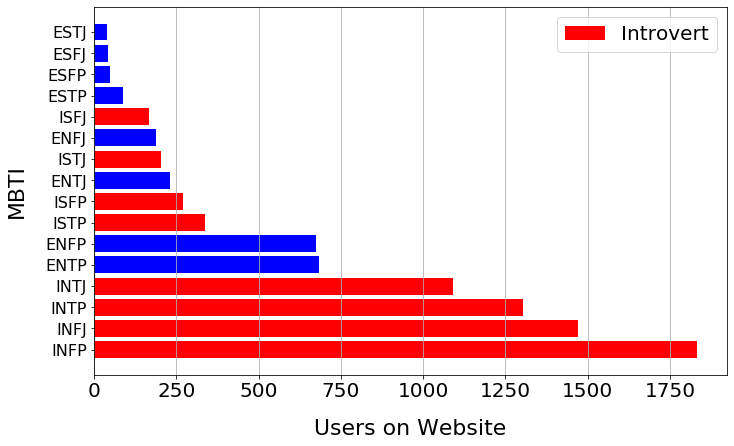

In [33]:
hist_data = list(type_count['posts'])
hist_label = list(type_count['type'])
ei_colors = ['red', 'blue']
ei_legend = ['Introvert', 'Extrovert']
color_by_ei = [ei_colors[hist_label[i][:1]=="E"] for i in range(len(hist_label))]
y = np.arange(len(hist_data))

width = 0.8

fig, ax = plt.subplots(figsize = (10,6))
# ax.barh(y, hist_data, width, color = ['wheat'], align = 'center')
ax.barh(y, hist_data, width, color = color_by_ei, align = 'center')
ax.legend(ei_legend)

ax.set_yticks(y)
ax.set_yticklabels(hist_label, size=16)
# ax.set_xticklabels(size=16)
ax.xaxis.grid(True)
ax.set_ylabel('MBTI', size=22, labelpad=18)
ax.set_xlabel('Users on Website', size=22, labelpad=18)
fig.tight_layout(pad=0)

plt.show()

# *'*'*'*'* Issue with Legend *'*'*'*'*

In [23]:
txt_raw = raw['posts'][0]
txt_raw

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [21]:
def lowercase_text(text):
    return text.lower()

In [25]:
txt_rw_lw = lowercase_text(raw_text)
txt_rw_lw

"'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.|||may the perc experience immerse you.|||the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206|||hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [31]:
def split_text_by_delim(text, delim=' '):
    return text.split(delim)

In [35]:
txt_posts = split_text_by_delim(txt_rw_lw, '|||')
len(txt_posts)

50

In [36]:
txt_posts

["'http://www.youtube.com/watch?v=qsxhcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks',
 'what has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.',
 'may the perc experience immerse you.',
 'the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206',
 "hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

# count of char by post

In [100]:
def post_tot_word_char_count(text_list):
    '''
    Counts number of words and characters in a list of text lines 
    
    Parameters: 
    text_list (str): list of text strings 
  
    Returns: 
    words: list of word count by source list item
    chars: list of character count by source list item
    '''
    words = []
    chars = []
    for post in range(len(text_list)):
        words.append(len(txt_posts[post].split(" ")))
        chars.append(len(txt_posts[post]))
    return zip(words, chars)

In [ ]:
user1 = post_word_char_count(txt_posts)
list(user1)

In [104]:
def post_unique_word_count(text_list):
    post_tot_word_char_count(text_list):
    '''
    Counts number of unique words in a list of text lines 
    
    Parameters: 
    text_list (str): list of text strings 
  
    Returns: 
    words: list of word count by source list item
    '''
    pass

In [ ]:
def user_char_count():

In [46]:
sample = txt_posts[7]
print(sample)
"http://v" in sample

hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...


False

# Flag for links

In [55]:
link_flag = []
[link_flag.append('http' in txt_posts[i]) for i in range(len(txt_posts))]
link_flag

[True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False]

In [59]:
def post_contains_links(text):
    link_flag = []
    all_flags = [link_flag.append('http' in text[i]) for i in range(len(text))]
    return all_flags

post_link_flag = post_contains_links(txt_posts)
post_link_flag

SyntaxError: invalid syntax (<ipython-input-59-2932f92f40f1>, line 3)

In [67]:
def remove_punctuation(text, punctuation=punctuation):
    post_list = []
    for a in range(len(text)):
        return post_list.append(''.join([c for c in text if c not in punctuation]))
    

txt_rw_lw_np = remove_punctuation(txt_posts, punctuation=punctuation)
print(txt_rw_lw_np)
txt_posts



None


["'http://www.youtube.com/watch?v=qsxhcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks',
 'what has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.',
 'may the perc experience immerse you.',
 'the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206',
 "hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [ ]:
def remove_newline(text):
    return text.replace('\n', '')

In [ ]:
def remove_stopwords(word_lst, stopwords_set):
    return [word for word in word_lst if word not in stopwords_set]

In [ ]:
def replace_names(word_lst, name_set, replacement_val):
    word_lst_with_replacement = [] 
    for word in word_lst:
        if word in name_set:
            val = replacement_val
        else:
            val = word
        word_lst_with_replacement.append(val)
    return word_lst_with_replacement

In [ ]:
def create_cleaned_textline_from_words(words):
    text = ' '.join([word for word in words])
    return text

In [ ]:
def line_cleaning_pipeline(text, stopwords_set, name_set, replace_val):
    text_lc = lowercase_text(text)
    text_np = remove_punctuation(text_lc)
    text_nnl = remove_newline(text_np)
    words = split_text_into_words(text_nnl)
    words_nsw = remove_stopwords(words, stopwords_set)
    words_cleaned = replace_names(words_nsw, name_set, replace_val) 
    line_of_text_cleaned = create_cleaned_textline_from_words(words_cleaned)
    return line_of_text_cleaned